# Bra Virke!



<img src="https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/PukkisaariManty.jpg" alt="Tämä on uloin pala vanhaa runkoa.">

Ovan syns ett stycke av en tall, som föll i en höststorm på Pukkisaari, Helsingfors 2020. Furan hade växt där sedan 1700-talet och hade gått igenom mycket under den tiden. Precis som våra marker visar spår av istiden kan också trädens växtmönster tala om klimatförhållanden genom historien. I den här övningen undersöker vi hur det här exemplaret jämför sig med historiska väderrapporter.

## Årsringar - Hur uppkommer de?

Många trädarter kan leva i hundratals år. De växer genom en långsam, periodisk process, och spåren av den syns i stammen. Genom att undersöka stora mängder av fällda träd och jämföra dem skogar emellan kan man få information om klimatets variationer långa tider tillbaka. [Lapplands Årsringskalender](https://www.luke.fi/tietoa-luonnonvaroista/metsa/metsat-ja-ilmastonmuutos/puiden-vuosilustot/) grundas på sådan data från de senaste 7600 åren. Äldre träd har t.ex. kunnat fiskas upp från sjöbottnar, där de har bevarats under tusentals år. Sådana [dendrokronologiska](https://sv.wikipedia.org/wiki/Dendrokronologi) undersökningar kan visa oss tidpunkter för de största vulkanutbrotten och mest betydande vädermässiga avvikelserna, och ger en liknande inblick i klimathistorien som polarområdenas isborrningar och världshavens uråldriga koraller.

De nedre delarna av stammen är äldst, och där hittas mest information. Trädsnittet som syns på bilden är taget c.a 4 meter från roten, och säger därför inget om trädets första årtionden.

Tallens stam växer sig samtidigt längre och grövre. Tillväxten sker snabbast under vår och tidig sommar, och då skapas det ljusare vårvirket. Under sensommaren och hösten är tillväxten långsammare, och då bildas en tunnare ring av det mörkare höstvirket. Under goda år kan trädets diameter öka med flera millimeter, och under svårare år växer det knappt alls.

Vilka faktorer påverkar trädets tillväxt? Hurudana förhållanden är gynnsamma ur växtens synvinkel? Har dessa förhållanden en annan inverkan på ett träd som växt på en stenig ö vid sjöstranden än på ett som växt på skogsbacken?

## Väderrapporter - Kaisaniemi station

#### Kör denna cell först:

In [2]:
# Med hjälp av import-kommandot läser vi in de nödvändiga funktionspaketen.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 1. Data

Datan som används kan hittas i [Meteorologiska institutets Open Data-portal](https://www.ilmatieteenlaitos.fi/avoin-data), och de äldre uppgifterna från [Kilotavu-hemsidan](https://kilotavu.com/asema-taulukko.php?asema=100971).

Kaisaniemi station är en av Finlands äldsta meteorologiska mätstationer, och befinner sig dessutom tillräckligt nära den fällda furans växtplats för att variationerna mellan de två platsernas väderförhållanden ska kunna antas vara mycket små. De första mätningarna i Kaisaniemi enligt Kilotavu är från 1844, men för att göra koden enklare för oss vill vi bara ha rapporter från hela år, så vi låter beräkningarna börja från 1845.

In [3]:
# Vi läser in datan som variabler. 

KLam = pd.read_csv("../data/KeskLam.txt", sep = "\t")
KSade = pd.read_csv("../data/Sadesumma.txt", sep = "\t")

In [4]:
# Vi kontrollerar hur temperaturdatan ser ut. (Enheten är celsius)

KLam.head(10)

,Vuosi,Tammi,Helmi,Maalis,Huhti,Touko,Kesä,Heinä,Elo,Syys,Loka,Marras,Joulu
0,1844,NaN,NaN,NaN,NaN,NaN,NaN,14.3,16.0,11.6,5.9,-2.1,-7.3
1,1845,-1.4,-12.2,-8.9,-0.3,5.8,12.8,16.5,16.2,11.0,3.9,2.6,-2.7
2,1846,-8.1,-11.4,-0.2,2.1,6.5,13.1,17.2,20.6,11.2,8.4,1.6,-6.5
3,1847,-4.4,-11.1,-5.4,-2.4,6.6,14.6,15.5,18.0,13.0,5.0,4.1,-0.5
4,1848,-10.8,-3.6,-1.0,3.9,8.4,13.2,14.5,14.3,10.7,5.8,0.7,-2.9
5,1849,-10.1,-5.3,-4.6,-0.1,8.4,11.0,14.6,15.6,10.4,4.6,0.9,-5.6
6,1850,-14.4,-6.0,-6.8,1.2,9.0,13.2,16.9,16.9,10.3,5.3,-1.5,-0.7
7,1851,-5.4,-7.5,-6.6,2.9,6.5,13.4,16.0,14.1,11.3,7.2,3.0,-0.9
8,1852,-5.2,-9.0,-2.9,-2.4,7.6,15.4,16.5,16.2,11.4,1.4,-4.4,-3.0
9,1853,-3.1,-7.6,-8.2,-1.2,8.2,15.4,17.2,14.2,11.0,6.4,2.7,-2.7


In [5]:
# Och sedan kontrollerar vi regndatan (Enhet: millimeter)

KSade.head(10)

,Vuosi,Tammi,Helmi,Maalis,Huhti,Touko,Kesä,Heinä,Elo,Syys,Loka,Marras,Joulu
0,1844,NaN,NaN,NaN,NaN,NaN,NaN,51.0,31.0,56.0,87.0,31.0,12.0
1,1845,10.0,31.0,15.0,25.0,9.0,33.0,30.0,61.0,82.0,98.0,43.0,64.0
2,1846,46.0,26.0,55.0,73.0,19.0,9.0,27.0,50.0,37.0,38.0,28.0,43.0
3,1847,15.0,28.0,21.0,20.0,25.0,48.0,30.0,17.0,69.0,34.0,47.0,63.0
4,1848,19.0,42.0,14.0,85.0,42.0,20.0,39.0,72.0,64.0,111.0,151.0,36.0
5,1849,57.0,24.0,22.0,38.0,7.0,73.0,81.0,90.0,42.0,94.0,49.0,25.0
6,1850,17.0,46.0,29.0,6.0,87.0,78.0,25.0,80.0,18.0,100.0,84.0,21.0
7,1851,34.0,24.0,10.0,34.0,37.0,51.0,45.0,71.0,21.0,74.0,89.0,43.0
8,1852,72.0,41.0,24.0,21.0,20.0,44.0,6.0,50.0,89.0,89.0,80.0,68.0
9,1853,40.0,30.0,22.0,45.0,34.0,4.0,16.0,79.0,76.0,63.0,25.0,11.0


#### 2. Analys

In [6]:
# Vi börjar med en riktigt grov analys: märker vi något som särskiljer sig i årsstatistiken?
# Den här cellen avger ett felmeddelande, men oroa dig inte, den varnar bara att det finns smidigare sätt att koda detta.


# Här skapar vi en ny kolumn i de tidigare tabellerna, och kallar den KA:

 
KSade["KA"] = np.zeros(len(KSade))   # np.zeros skapar en serie nollor. len(MRegn) gör att den blir lika lång som tabellen.


KLam["KA"] = np.zeros(len(KLam))

# Här går vi genom datan en rad åt gången, och sparar ett värde i den nya kolumnen för varje rad. Vilket värde?
# Vad händer om tabellvärden saknas (NaN - Not a Number)?

for i in range(len(KSade)):
    KSade["KA"][i] = (KSade["Tammi"][i]+KSade["Helmi"][i]+KSade["Maalis"][i]+KSade["Huhti"][i]+KSade["Touko"][i]
    +KSade["Kesä"][i]+KSade["Heinä"][i]+KSade["Elo"][i]+KSade["Syys"][i]+KSade["Loka"][i]
    +KSade["Marras"][i]+KSade["Joulu"][i])/12
    
for i in range(len(KLam)):
    KLam["KA"][i] = (KLam["Tammi"][i]+KLam["Helmi"][i]+KLam["Maalis"][i]+KLam["Huhti"][i]+KLam["Touko"][i]
    +KLam["Kesä"][i]+KLam["Heinä"][i]+KLam["Elo"][i]+KLam["Syys"][i]+KLam["Loka"][i]
    +KLam["Marras"][i]+KLam["Joulu"][i])/12
    
# Kör den här cellen. Hur ser datan ut nu? 

<ipython-input-6-4568cb8ee384>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KSade["KA"][i] = (KSade["Tammi"][i]+KSade["Helmi"][i]+KSade["Maalis"][i]+KSade["Huhti"][i]+KSade["Touko"][i]
<ipython-input-6-4568cb8ee384>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KLam["KA"][i] = (KLam["Tammi"][i]+KLam["Helmi"][i]+KLam["Maalis"][i]+KLam["Huhti"][i]+KLam["Touko"][i]


In [7]:
# Kontrollera datan här efter att du har kört cellen ovan. Vilket kommando behöver du?





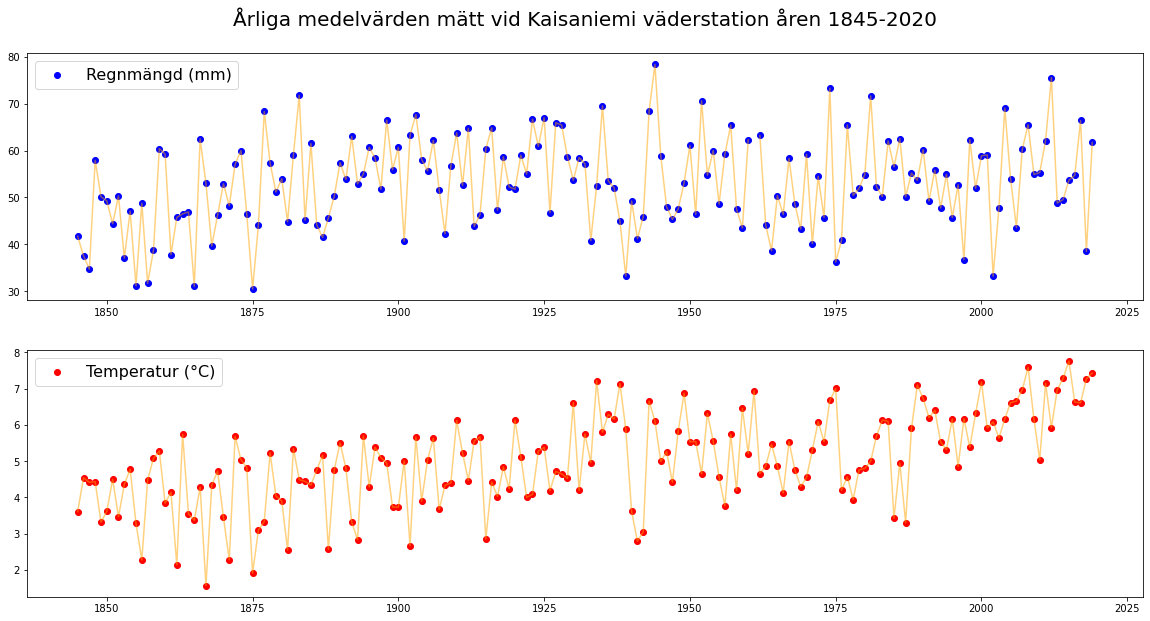

In [8]:
# Vi visualiserar tabellen som ett diagram.

# Subplot-kommandot gör det möjligt att ha flera diagram bredvid varandra.

plt.subplots(figsize = (20,10))

# För tydlighetens skull ritar vi både en graf (plot) och ett punktdiagram (scatter),
# så att vi lätt kan urksilja enskilda datapunkter.


plt.subplot(211)   # Argumentet avgör subplotens position
plt.plot(KSade["Vuosi"], KSade["KA"], alpha = 0.5, color = "orange", label = "_nolegend_")
plt.scatter(KSade["Vuosi"], KSade["KA"], label = "Regnmängd (mm)", color = "b")
plt.legend(loc = "upper left", fontsize = 16)

plt.title("Årliga medelvärden mätt vid Kaisaniemi väderstation åren 1845-2020\n", fontsize = 20)

plt.subplot(212)
plt.plot(KLam["Vuosi"], KLam["KA"], alpha = 0.5, color = "orange", label = "_nolegend_")
plt.scatter(KLam["Vuosi"], KLam["KA"], label = "Temperatur (°C)", color = "r")
plt.legend(loc = "upper left", fontsize = 16)


plt.show()


I de grovt beräknade graferna ovan ser vi de årliga medeltalen. Den här modellen hoppar över flera viktiga beräkningar, men ger en bra första uppfattning om variationerna mellan åren. Om vi till exempel ser på åren mellan 1930 och 1940 ser vi att det under flera år var avvikande kallt och torrt. Vilken händelse inträffade samtidigt i världen? Kan du urskilja den tidsperioden i årsringarna på den första bilden? (Räkna tillbaka från den yttersta ringen 2020) Kan du hitta andra avvikande tidsperioder?

#### 3. Djupare analys

Vi undersöker den tillgängliga informationen en aning noggrannare. Trädens tillväxt sker inte under hela året, så det årliga medeltalet säger inte så mycket. Vi begränsar beräkningarna till vissa årstider istället. Valet av begränsningar är ett omfattande beslut, men vi börjar med en grov indelning i sommar- och vintertid.

Du kan själv välja indelningen enligt intresse. En bra indelning kunde vara att följa den [termiska vegetationsperioden](https://sv.wikipedia.org/wiki/Vegetationsperiod), då medeltemperaturen överstiger 5°C. [Meteorologiska institutets kartor](https://www.ilmatieteenlaitos.fi/terminen-kasvukausi) över vegetationsperioden säger oss att perioden i detta område varar från slutet av april till slutet av oktober. (Kartorna är baserade på åren 1981-2020. Tidigare år var i allmänhet kallare.)


<img src = "https://old.ilmatieteenlaitos.fi/image/image_gallery?groupId=30106&t=1353329979095&uuid=cf942d29-b79d-4836-9587-0c269451272e" align = left>

<img src = "https://old.ilmatieteenlaitos.fi/image/image_gallery?groupId=30106&t=1353329979095&uuid=42653c45-a1e2-4fba-8eb6-ad248b65766b" align = center> 

In [13]:
# Vi åtskiljer medeltalen för tillväxtperioderna och vintrarna. 

saK = np.zeros(len(KSade))
KSade["KAK"] = saK

saT = np.zeros(len(KSade))
KSade["KAT"] = saT

laK = np.zeros(len(KLam))
KLam["KAK"] = laK

laT = np.zeros(len(KLam))
KLam["KAT"] = laT

# Vi itererar över tillväxtperiodernas data.
# Om du vill ändra beräkningarna kan du lägga till och ta bort kolumner ur beräkningen.

# Detta är en for-loop. "for i in range(10)" innebär att indexet i antar värden 0 till 9, och loopen går således 10 varv.
# Här använder vi len(KSade) som gräns, alltså antalet rader i tabellen.
# Loopen gör alltså en beräkning för varje rad. Vi använder "KSade["Touko"][i]" etc. för att plocka värden från rad i.

for i in range(len(KSade)):
    KSade["KAK"][i] = (KSade["Touko"][i]+KSade["Kesä"][i]+KSade["Heinä"][i]
    +KSade["Elo"][i]+KSade["Syys"][i]+KSade["Loka"][i])/6
    
for i in range(len(KLam)):
    KLam["KAK"][i] = (KLam["Touko"][i]+KLam["Kesä"][i]+KLam["Heinä"][i]
    +KLam["Elo"][i]+KLam["Syys"][i]+KLam["Loka"][i])/6
    
# Vi gör en likadan iteration för vinterperiodens data.

for i in range(len(KSade)):
    KSade["KAT"][i] = (KSade["Tammi"][i]+KSade["Helmi"][i]+KSade["Maalis"][i]+KSade["Huhti"][i]
    +KSade["Marras"][i]+KSade["Joulu"][i])/6
    
for i in range(len(KLam)):
    KLam["KAT"][i] = (KLam["Tammi"][i]+KLam["Helmi"][i]+KLam["Maalis"][i]+KLam["Huhti"][i]
    +KLam["Marras"][i]+KLam["Joulu"][i])/6


<ipython-input-13-7daede9e1ff2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KSade["KAK"][i] = (KSade["Touko"][i]+KSade["Kesä"][i]+KSade["Heinä"][i]
<ipython-input-13-7daede9e1ff2>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KLam["KAK"][i] = (KLam["Touko"][i]+KLam["Kesä"][i]+KLam["Heinä"][i]
<ipython-input-13-7daede9e1ff2>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KSade["KAT"][i] = (KSade["Tammi"][i]+KSade["Helmi"][i

In [9]:
# Tässä välissä kannattaa tarkastaa että uudet sarakkeet tosiaankin ovat ilmestyneet aineistoon.
# Kirjoita tähän sopiva komento ja tarkista asia!



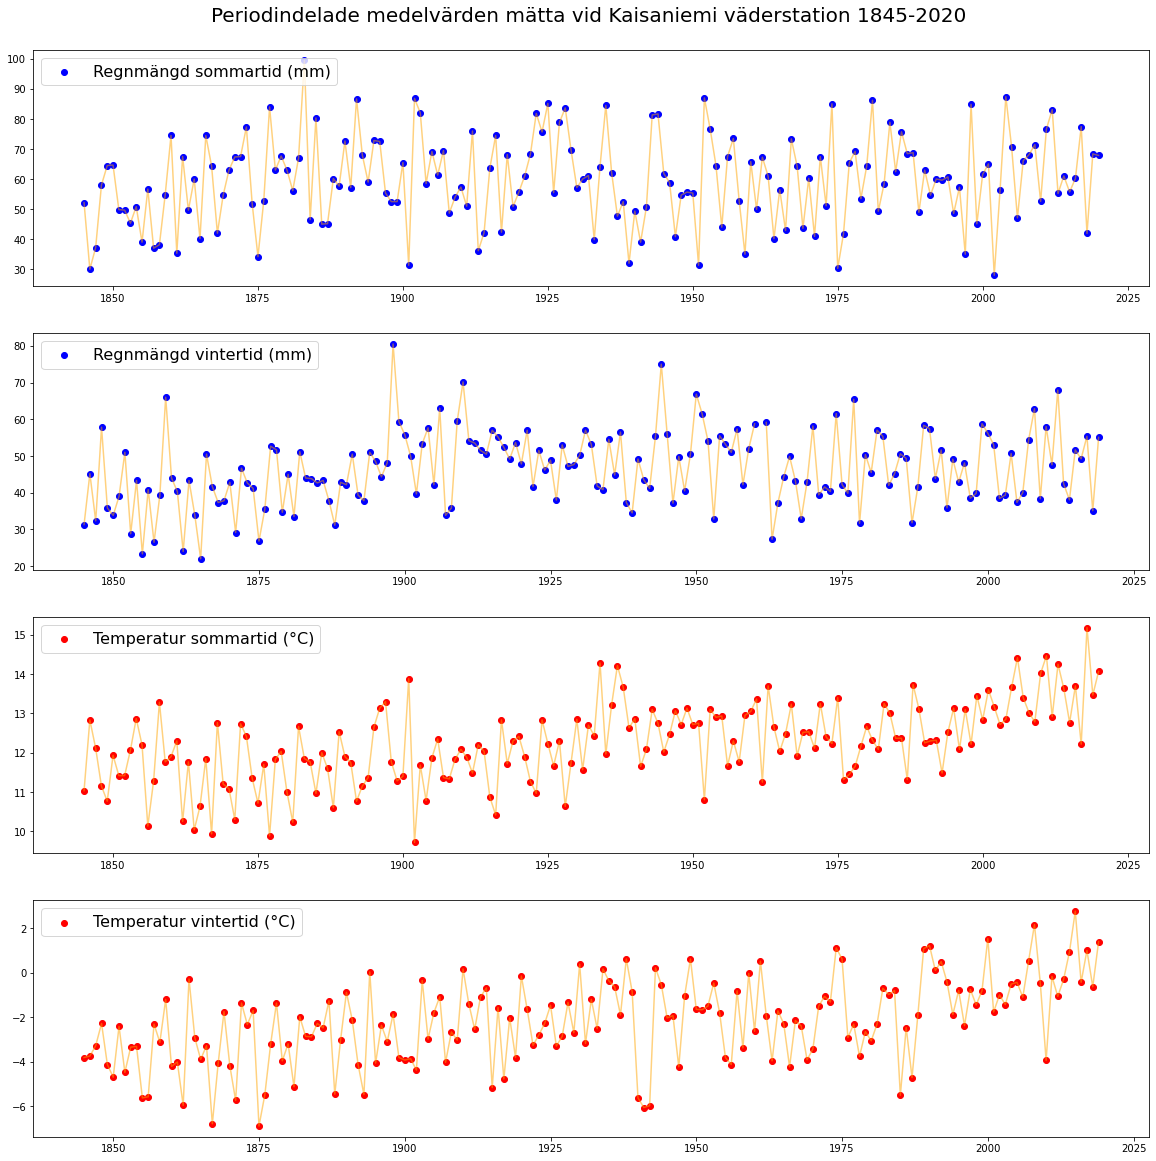

In [17]:
# Vi gör fler diagram. Denna gång med åtskilda vinter-och sommarperioder.

plt.subplots(figsize = (20,20))

# Vi ritar en graf (plot) och ett punktdiagram (scatter) på varandra för att göra det tydligare.

# subplot(xyz) arrangerar flera diagram i x rader och y kolumner. Index z anger i vilken position grafen ska skapas.
# Genom att ändra dessa index kan du flytta på graferna.


plt.subplot(411)
plt.plot(KSade["Vuosi"], KSade["KAK"], alpha = 0.5, color = "orange", label = "_nolegend_")
plt.scatter(KSade["Vuosi"], KSade["KAK"], label = "Regnmängd sommartid (mm)", color = "b")
plt.legend(loc = "upper left", fontsize = 16)

plt.title("Periodindelade medelvärden mätta vid Kaisaniemi väderstation 1845-2020 \n", fontsize = 20)

plt.subplot(412)
plt.plot(KSade["Vuosi"], KSade["KAT"], alpha = 0.5, color = "orange", label = "_nolegend_")
plt.scatter(KSade["Vuosi"], KSade["KAT"], label = "Regnmängd vintertid (mm)", color = "b")
plt.legend(loc = "upper left", fontsize = 16)

plt.subplot(413)
plt.plot(KLam["Vuosi"], KLam["KAK"], alpha = 0.5, color = "orange", label = "_nolegend_")
plt.scatter(KLam["Vuosi"], KLam["KAK"], label = "Temperatur sommartid (°C)", color = "r")
plt.legend(loc = "upper left", fontsize = 16)

plt.subplot(414)
plt.plot(KLam["Vuosi"], KLam["KAT"], alpha = 0.5, color = "orange", label = "_nolegend_")
plt.scatter(KLam["Vuosi"], KLam["KAT"], label = "Temperatur vintertid (°C)", color = "r")
plt.legend(loc = "upper left", fontsize = 16)


plt.show()


#### 4. På egen hand

Man kanske kan få ut ytterligare information om man begränsar beräkningarna till kärnvintern (december-januari) eller midsommar (juni-juli). Pröva själv att ändra på beräkningarna för att undersöka dessa. Skriv den koden här nedanför.

In [19]:
# Skriv en kod som skapar nya kolumner i tabellerna KSade och KLam och beräknar värdena som behövs.



In [18]:
# Skriv en kod som får de nya värdena att synas i ett diagram



Jämför dina beräkningar med de ringar som syns i tallen. Trevlig forskning!

#### 5. Länkar

https://www.luke.fi/tietoa-luonnonvaroista/metsa/metsat-ja-ilmastonmuutos/puiden-vuosilustot/

https://fi.wikipedia.org/wiki/Vuosirengasajoitus

https://www.ilmatieteenlaitos.fi/terminen-kasvukausi

https://www.ilmatieteenlaitos.fi/avoin-data

https://kilotavu.com/asema-taulukko.php?asema=100971